## Aluno: Marcelo Ortiz de Santana

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [33]:
# resposta 1
df = pd.read_csv('house_prices.csv', sep=';')
print('### Antes tratamento ###') 
print('Dados faltantes:')
print(df.isnull().sum())

print('Dados duplicados:')
print(df.duplicated().sum())

[df[column].fillna(df[column].mean(), inplace=True) for column in df.columns] 
df.drop_duplicates(inplace = True) 

print('### Depois tratamento ###') 
print('Dados faltantes:')
print(df.isnull().sum())

print('Dados duplicados:')
print(df.duplicated().sum())

### Antes tratamento ###
Dados faltantes:
tamanho      1
n_quartos    1
idade        2
preco        0
dtype: int64
Dados duplicados:
1
### Depois tratamento ###
Dados faltantes:
tamanho      0
n_quartos    0
idade        0
preco        0
dtype: int64
Dados duplicados:
0


## 2) Há outliers no data set? Se sim, trate-os de forma adequada

(45, 5)

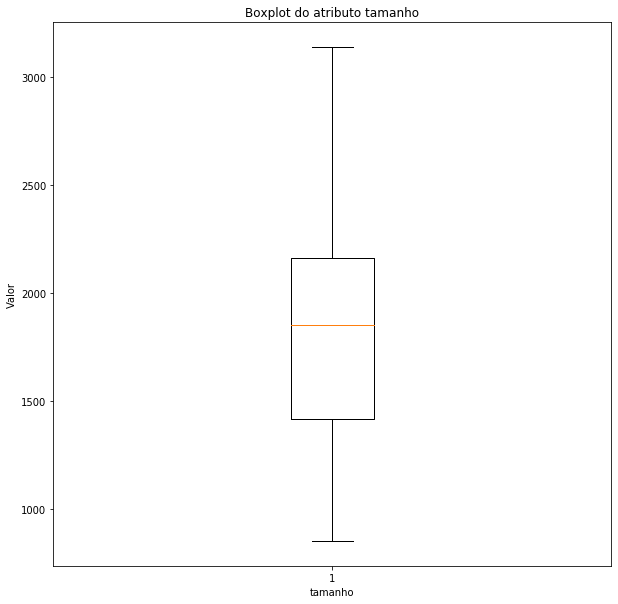

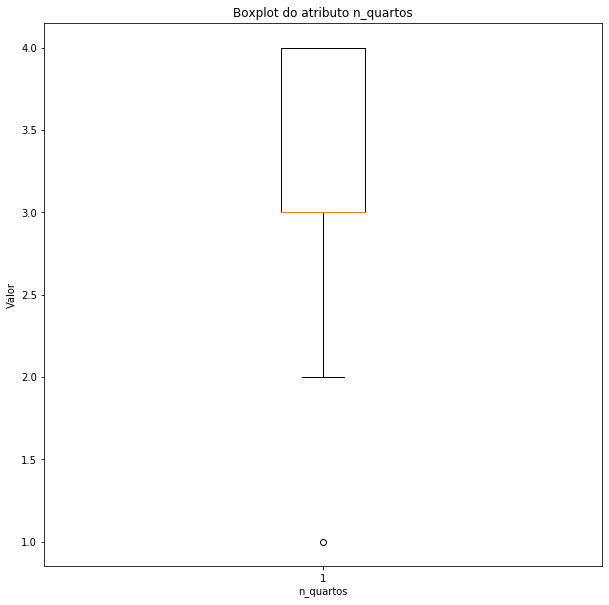

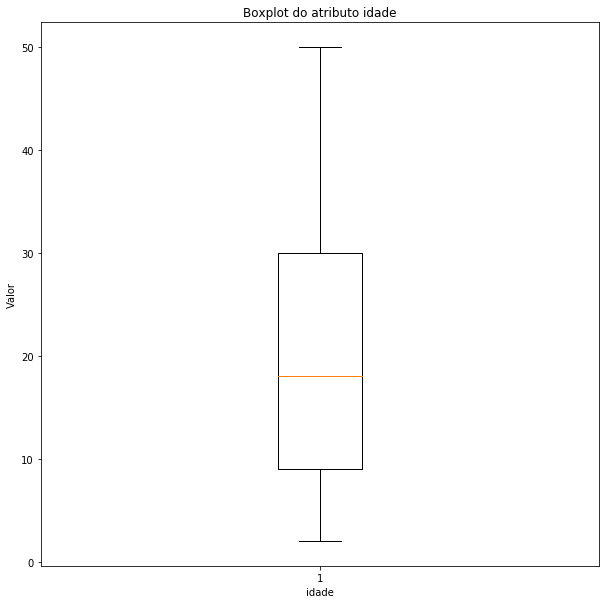

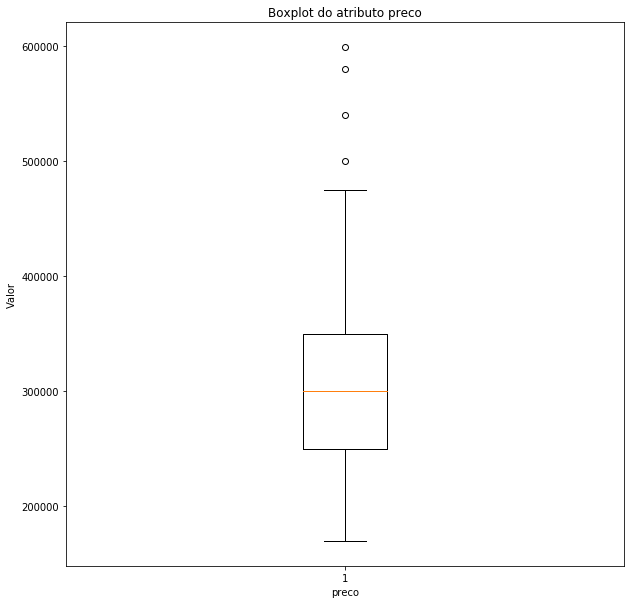

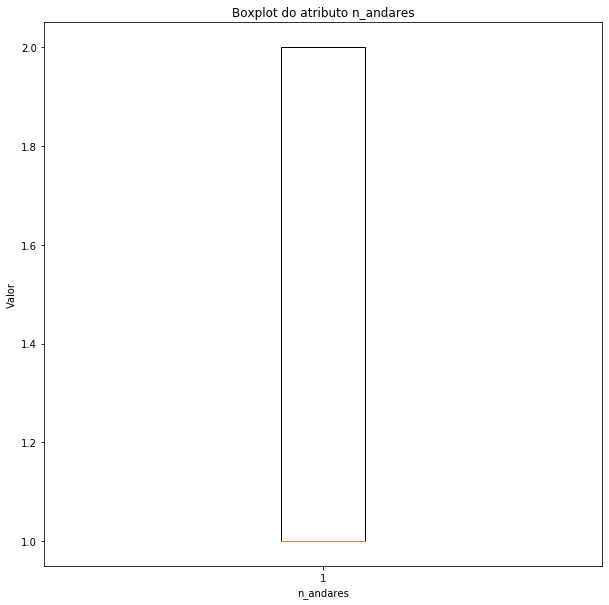

In [81]:
# resposta 2
def plot_boxplot(df, column):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Valor')
    ax.set_title(f'Boxplot do atributo {column}')
    ax.boxplot(df[column])
columns = df.columns 

[plot_boxplot(df, column) for column in columns]
df.shape

In [88]:
print("Há algumas casas com tamanhos, e uma com idade discrepantes. Talvez seja o caso de separarmos essas em outra base de treino e teste. Nesse caso, irei remover")

colunas_numericas = [coluna for coluna in df.columns if not coluna == 'preco']
# colunas_numericas
def remover_outliers(df, colunas_numericas):
    for coluna in colunas_numericas:
        mean_coluna, std_coluna = df[coluna].mean(), df[coluna].std()
        outlier_limit = std_coluna * 3
        df = df[(df[coluna] >= (mean_coluna - outlier_limit)) & (df[coluna] <= (mean_coluna + outlier_limit))]
    return df
df = remover_outliers(df, colunas_numericas)

Há algumas casas com tamanhos, e uma com idade discrepantes. Talvez seja o caso de separarmos essas em outra base de treino e teste. Nesse caso, irei remover


## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [46]:
# resposta 3
df['n_andares'] = np.random.randint(1, 3, df.shape[0])
df['n_andares'].head()

0    1
2    1
3    2
4    1
5    2
Name: n_andares, dtype: int64

## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

tamanho 0.8522739128558139
n_quartos 0.4492766908249656
idade -0.11106385425826605
n_andares 0.11420107899602272

Há uma forte relação linear entre a variável tamanho


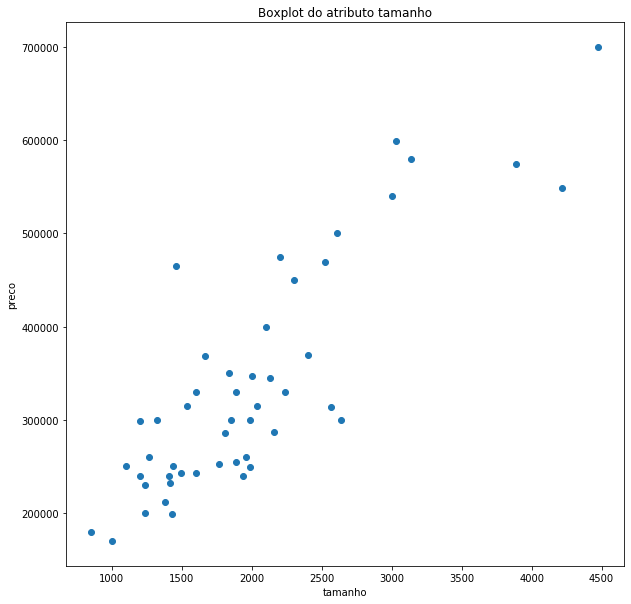

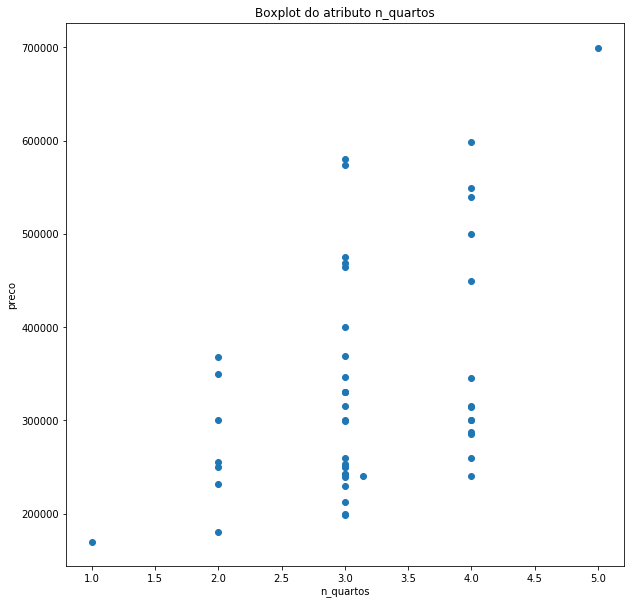

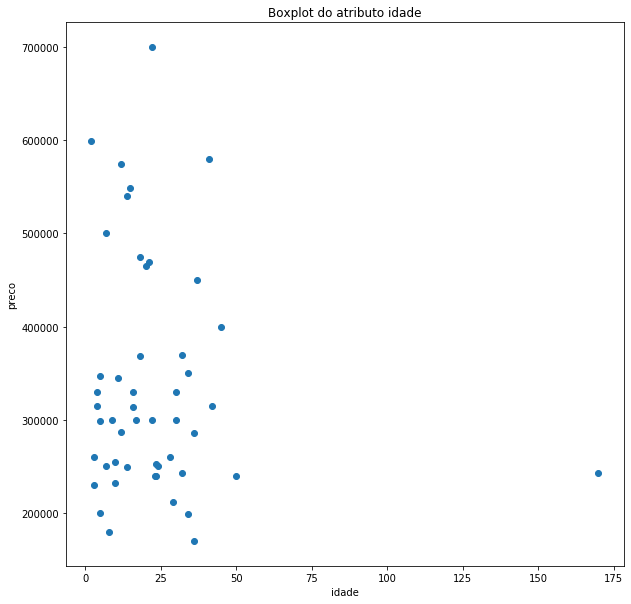

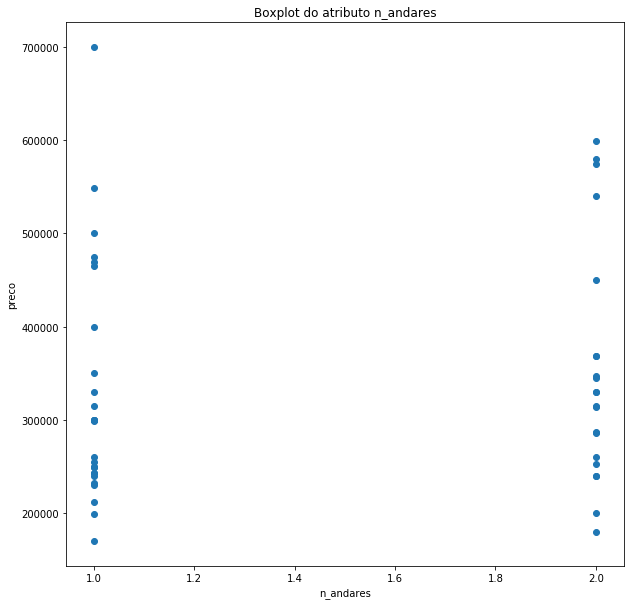

In [57]:
# resposta 4
meta = 'preco'
def plot_scatter(df, attribute, meta):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(f'{attribute}')
    ax.set_ylabel(f'{meta}')
    ax.set_title(f'Boxplot do atributo {attribute}')
    ax.scatter(df[attribute], df[meta])
columns_sem_meta = [column for column in df.columns if not column == meta]
columns_sem_meta
[plot_scatter(df, column, meta) for column in columns_sem_meta]
[print(column, df[column].corr(df[meta])) for column in columns_sem_meta]
print('\nHá uma forte relação linear entre a variável tamanho')

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [62]:
# resposta 5
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
print(train.shape)
print(test.shape)

(34, 5)
(15, 5)


## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [102]:
# resposta 6
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = train[columns_sem_meta]
y = train[meta]
reg = LinearRegression().fit(X, y)
y_predict = reg.predict(X)
mse_treino = np.mean((y_predict - y)**2) 
print(mse_treino)
print(metrics.mean_squared_error(y, y_predict))

4384117145.64274
4384117145.64274


## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? 

In [109]:
# resposta 7
X = test[columns_sem_meta]
y = test[meta]
y_predict = reg.predict(X)
metrics.mean_squared_error(y, y_predict)
metrics.r2_score(y, y_predict)

0.7502037754932666